<a href="https://colab.research.google.com/github/MuhammadBilal-Hub771/ML/blob/AI/whatsappChatAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 13.9 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade emoji


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import emoji


In [ ]:
all_emojis = [c for msg in df['Message'] for c in msg if emoji.is_emoji(c)]

In [ ]:
# Load data
def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.readlines()


In [ ]:
# After load_data() function
print("First 5 lines of your file:")
print(data[:5])  # Show first 5 lines of the chat

First 5 lines of your file:
['7/26/23, 12:05\u202fPM - Shehzad Skp created group "IAC discussion group "\n', '7/26/23, 12:05\u202fPM - You were added\n', '8/9/24, 8:50\u202fPM - Shehzad Skp: Salam hassan bhai finely thanks 😊 a lot for this cake 🫶🏻🥳\n', 'Happy 😁 birthday 🥳 bro.. mazrat for late but you know wish krna bnta e tb hota ha jb koi cheez khelaye jaye...ab ap na cake khelaya tu once again happy birthday 🥳 bro 🫶🏻🥳...\n', 'Keep shining always 🥳🤲🏻\n']


In [ ]:
# Parse data
def parse_data(data):
    messages, dates, users = [], [], []

    for line in data:
        line = line.strip()
        if not line:
            continue

        # Improved regex pattern to handle multiple WhatsApp formats
        match = re.match(
            r'^(\[?\d{1,2}[/-]\d{1,2}[/-]\d{2,4}[,\]\s]+\d{1,2}:\d{2}(?::\d{2})?\s?[AP]?M?[\]\s]*[-]\s)([^:]+):\s?(.*)',
            line
        )

        if match:
            date_time_full = match.group(1).strip() # Capture the full date-time string
            user = match.group(2).strip()
            message = match.group(3).strip()

            # Clean date-time string: remove brackets, timestamp, and trailing hyphen
            date_time_cleaned = re.sub(r'[\[\]]', '', date_time_full)  # Remove brackets
            # Remove the timestamp and the trailing hyphen, assuming the format is Date, Time -
            # This regex specifically looks for a comma followed by space, then the time part, then space and hyphen
            date_time_cleaned = re.sub(r',\s+\d{1,2}:\d{2}(?::\d{2})?\s?[AP]?M?\s*-', '', date_time_cleaned).strip()

            # Now append only the cleaned date
            dates.append(date_time_cleaned)
            users.append(user)
            messages.append(message)

    return pd.DataFrame({'Date': dates, 'User': users, 'Message': messages})

In [ ]:
print("First 5 lines of your chat file:")
for i, line in enumerate(data[:5]):
    print(f"{i}: {line.strip()}")

First 5 lines of your chat file:
0: 7/26/23, 12:05 PM - Shehzad Skp created group "IAC discussion group "
1: 7/26/23, 12:05 PM - You were added
2: 8/9/24, 8:50 PM - Shehzad Skp: Salam hassan bhai finely thanks 😊 a lot for this cake 🫶🏻🥳
3: Happy 😁 birthday 🥳 bro.. mazrat for late but you know wish krna bnta e tb hota ha jb koi cheez khelaye jaye...ab ap na cake khelaya tu once again happy birthday 🥳 bro 🫶🏻🥳...
4: Keep shining always 🥳🤲🏻


In [ ]:
# Analyze data
def analyze_data(df):
    # Top 5 active users
    top_users = df['User'].value_counts().head(5)

    # Busiest days
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day'] = df['Date'].dt.day_name()
    busy_days = df['Day'].value_counts()

    # Top 5 emojis
    all_emojis = [c for msg in df['Message'] for c in msg if c in emoji.EMOJI_DATA]
    top_emojis = Counter(all_emojis).most_common(5)

    return top_users, busy_days, top_emojis


In [ ]:
# Plot results
def plot_results(top_users, busy_days, top_emojis):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_users.index, y=top_users.values)
    plt.title('Top 5 Active Users')
    plt.show()

    #plt.figure(figsize=(10, 5))
    #sns.barplot(x=busy_days.index, y=busy_days.values)
    #plt.title('Busiest Days')
    #plt.show()


    # Check if top_emojis is not empty before plotting
    if top_emojis:
        emojis, counts = zip(*top_emojis)
        plt.figure(figsize=(10, 5))
        # Convert emojis to strings to ensure correct plotting, especially if they are complex emoji sequences
        sns.barplot(x=[str(e) for e in list(emojis)], y=list(counts))
        plt.title('Top 5 Emojis Used')
        plt.show()
    else:
        print("No emojis found in the messages.")

In [ ]:
# Plot results
def plot_results(top_users, busy_days, top_emojis):
    plt.figure(figsize=(10, 5))

    # Use a distinct color palette
    colors = sns.color_palette("Set3", n_colors=len(top_users))

    # Create bar plot with custom colors
    sns.barplot(x=top_users.index, y=top_users.values, palette=colors)

    plt.title('Top 5 Active Users', fontsize=14, fontweight='bold', color='#333333')
    plt.xlabel('User', fontsize=12)
    plt.ylabel('Messages Sent', fontsize=12)
    plt.xticks(rotation=45, fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()


<ipython-input-63-52c81380c1fd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


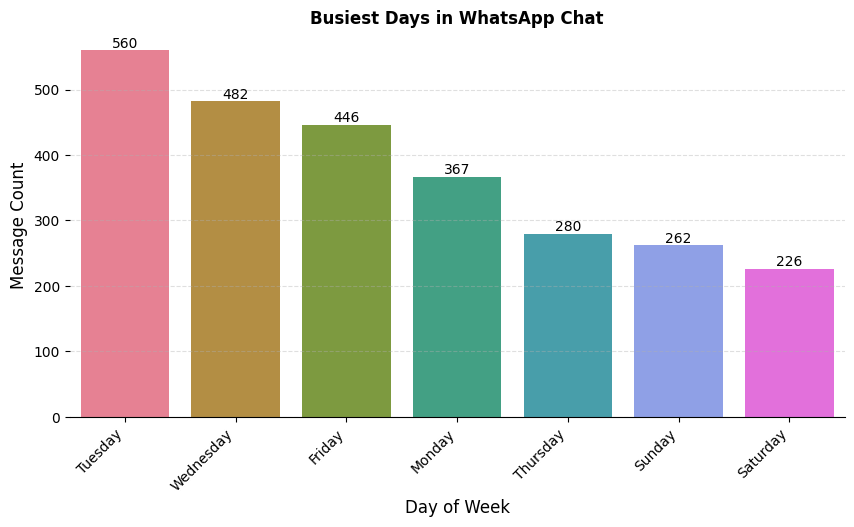

In [ ]:
plt.figure(figsize=(10, 5))

# Create a custom color palette (or use predefined ones like 'viridis', 'rainbow')
custom_palette = sns.color_palette("husl", n_colors=len(busy_days))

# Plot with different colors
ax = sns.barplot(
    x=busy_days.index,
    y=busy_days.values,
    palette=custom_palette  # Assign unique colors
)

plt.title('Busiest Days in WhatsApp Chat', fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Message Count', fontsize=12)

# Optional: Add value labels on top of bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Customize grid and spines
sns.despine(left=True)  # Remove left spine
ax.grid(axis='y', linestyle='--', alpha=0.4)  # Add horizontal grid lines

# Rotate x-labels if needed
plt.xticks(rotation=45, ha='right')

plt.style.use('dark_background')
custom_palette = sns.color_palette("light:#5A9", n_colors=len(busy_days))

plt.show()

<ipython-input-67-210d7cf912cd>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-67-210d7cf912cd>:63: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-67-210d7cf912cd>:63: UserWarning: Glyph 128064 (\N{EYES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-67-210d7cf912cd>:63: UserWarning: Glyph 129401 (\N{FACE HOLDING BACK TEARS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128064 (\N{EYES}) mi

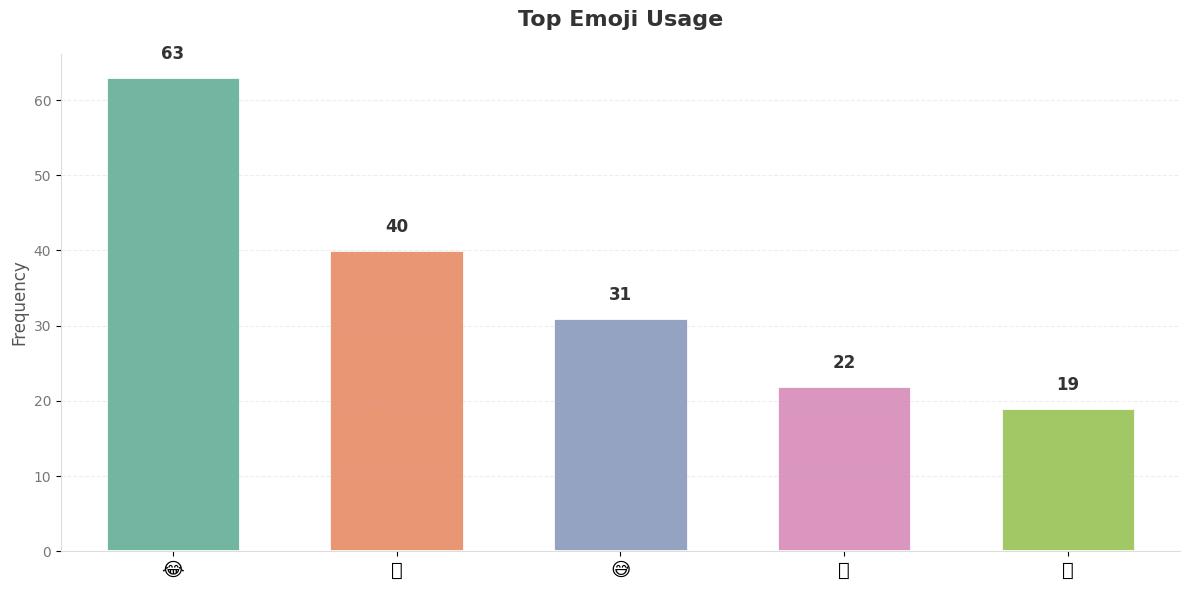

In [ ]:
if top_emojis:
    emojis, counts = zip(*top_emojis)

    # Set white background style
    plt.style.use('default')
    plt.rcParams['figure.facecolor'] = 'white'

    plt.figure(figsize=(12, 6), facecolor='white')

    # 1. Use a distinct color palette
    colors = sns.color_palette("Set2", n_colors=len(emojis))

    # 2. Create the plot
    ax = sns.barplot(
        x=[str(e) for e in emojis],
        y=counts,
        palette=colors,
        width=0.6,
        edgecolor='white',
        linewidth=2
    )

    # 3. Clean title/labels
    plt.title('Top Emoji Usage',
             fontsize=16,
             fontweight='bold',
             pad=20,
             color='#333333')
    plt.xlabel('')
    plt.ylabel('Frequency',
              fontsize=12,
              color='#555555')

    # 4. Minimalist value labels
    for i, (emoji, count) in enumerate(zip(emojis, counts)):
        ax.text(
            i,
            count + max(counts)*0.03,
            f"{count}",
            ha='center',
            va='bottom',
            fontsize=12,
            color='#333333',
            fontweight='bold'
        )
        ax.get_xticklabels()[i].set_text(emoji)

    # 5. White background styling
    ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#dddddd')
    ax.spines['bottom'].set_color('#dddddd')

    # 6. Custom ticks and grid
    plt.xticks(fontsize=14)
    plt.yticks(color='#777777')
    ax.grid(axis='y',
            linestyle='--',
            alpha=0.2,
            color='#aaaaaa')

    plt.tight_layout()
    plt.show()


<ipython-input-61-f8be992e329e>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-69-42011d4cf990>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index, y=top_users.values, palette=colors)


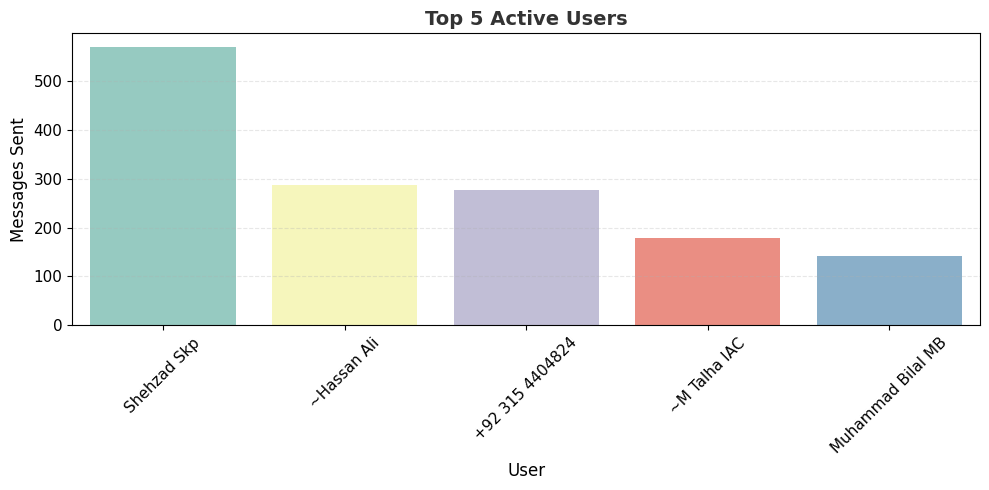

In [ ]:

# Run the analysis
file_path = '/content/WhatsApp Chat with IAC discussion group .txt'  # Replace with your file name
data = load_data(file_path)
df = parse_data(data)
top_users, busy_days, top_emojis = analyze_data(df)
plot_results(top_users, busy_days, top_emojis)